# Laboratorio 2: Data Understanding

**Universidad del Valle de Guatemala**  
**Facultad de Ingeniería**  
**Departamento de Ciencias de la Computación**  
**Machine Learning Operations** 

## Integrantes

- Arturo Argueta - 21527 
- Edwin de León - 22809 
- Diego Leiva - 21752 
- Pablo Orellana - 21970

## Librerías

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de dataset

In [2]:
# Carpeta de datos
DATA_DIR = Path("data/raw")

# Cargar datos con cods con caracteres especialesificación latin1 para evitar problema
df_categoria = pd.read_csv(DATA_DIR / "categoria.csv", encoding="latin1")
df_cliente = pd.read_csv(DATA_DIR / "cliente.csv", encoding="latin1")
df_evento = pd.read_csv(DATA_DIR / "evento.csv", encoding="latin1")
df_marca = pd.read_csv(DATA_DIR / "marca.csv", encoding="latin1")
df_producto = pd.read_csv(DATA_DIR / "producto.csv", encoding="latin1")

# Definir diccionario de dataframes
dataframes = {
    "categoria": df_categoria,
    "cliente": df_cliente,
    "evento": df_evento,
    "marca": df_marca,
    "producto": df_producto
}

# Dimensiones de los DataFrames
print("-"*8," Dimensiones de los DataFrames ","-"*8,"\n")
for name, df in dataframes.items():
    print(f"{name:10s}-> registros: {df.shape[0]:>7}, columnas: {df.shape[1]:>3}")

--------  Dimensiones de los DataFrames  -------- 

categoria -> registros:     101, columnas:   2
cliente   -> registros:   12000, columnas:  12
evento    -> registros: 2756101, columnas:   5
marca     -> registros:     307, columnas:   2
producto  -> registros:   12026, columnas:   6


## Información general de tablas

In [3]:
for name, df in dataframes.items():
    print("-"*15, f"{name.upper()}", "-"*15)
    df.info(verbose=True, memory_usage=False)
    print("\n")

--------------- CATEGORIA ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         101 non-null    int64 
 1   categoria  101 non-null    object
dtypes: int64(1), object(1)

--------------- CLIENTE ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          11719 non-null  float64
 1   nombre      11719 non-null  object 
 2   apellido    11719 non-null  object 
 3   nacimiento  11719 non-null  object 
 4   genero      11719 non-null  object 
 5   empresa     11719 non-null  object 
 6   idioma      11719 non-null  object 
 7   nit         11719 non-null  object 
 8   puesto      11719 non-null  object 
 9   ciudad      11719 non-null  object 
 10  correo      11719 non-n

### Visualización de tablas básica

In [4]:
for name, df in dataframes.items():
    print("-"*15, f"{name.upper()}", "-"*15)
    display(df.head(3))

--------------- CATEGORIA ---------------


,id,categoria
0,1,SCOTCH WHISKIES
1,2,STRAIGHT BOURBON WHISKIES
2,3,BLENDED WHISKIES


--------------- CLIENTE ---------------


,id,nombre,apellido,nacimiento,genero,empresa,idioma,nit,puesto,ciudad,correo,telefono
0,599528.0,Samuel,Ward,4/6/89,Male,Yakijo,Marathi,411-44-7088,Geologist IV,Wangjing,sward0@tamu.edu,86-(786)608-5061
1,121688.0,Willie,Gonzales,6/29/72,Male,Zoonoodle,Maltese,701-87-7540,Programmer III,El Corozo,wgonzales1@apache.org,58-(265)301-3397
2,552148.0,Betty,Spencer,9/2/83,Female,Youtags,Dhivehi,373-88-4503,Engineer III,Jinhua,bspencer2@shutterfly.com,86-(195)193-9042


--------------- EVENTO ---------------


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN


--------------- MARCA ---------------


,id,marca
0,1,Diageo Americas
1,2,Heaven Hill Brands
2,3,"Sazerac Co., Inc."


--------------- PRODUCTO ---------------


,id,categoria_id,nombre,marca_id,volumen,precio
0,356475,9.0,Crown Royal Honey,1.0,750,22.49
1,15335,9.0,Crown Royal Regal Apple Mini,1.0,300,11.03
2,81345,9.0,Crown Royal Regal Apple,1.0,200,7.08


## Chequeo de calidad de datos

### Valores Duplicados

In [5]:
def duped_report(df, subset=None):
    """
    Genera un informe sobre los duplicados en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
        subset (list, optional): Lista de columnas a considerar para identificar duplicados.

    Returns:
        tuple: Número de duplicados y porcentaje de duplicados.
    """
    total = len(df) # Total de registros en el DataFrame
    dups = df.duplicated(subset=subset).sum() # Total de duplicados
    pct = round((dups / total) * 100, 2) if total > 0 else 0 # Porcentaje de duplicados
    return dups, pct

#### Registros duplicados

In [6]:
for name, df in dataframes.items():
    dups, pct = duped_report(df)
    print(f"{name:10s}: {dups} registros duplicados completos ({pct}%)")

categoria : 0 registros duplicados completos (0.0%)
cliente   : 280 registros duplicados completos (2.33%)
evento    : 460 registros duplicados completos (0.02%)
marca     : 0 registros duplicados completos (0.0%)
producto  : 0 registros duplicados completos (0.0%)


#### Llaves primarias duplicadas

In [7]:
for name, df in dataframes.items():
    # No se toma en cuenta EVENTO ya que no tiene llave
    if "id" in df.columns:
        dups, pct = duped_report(df, subset=["id"])
        print(f"{name:10s} (id): {dups} registros con duplicados en 'id' ({pct}%)")

categoria  (id): 0 registros con duplicados en 'id' (0.0%)
cliente    (id): 280 registros con duplicados en 'id' (2.33%)
marca      (id): 0 registros con duplicados en 'id' (0.0%)
producto   (id): 1 registros con duplicados en 'id' (0.01%)


#### Eventos duplicados

In [8]:
if {"timestamp", "visitorid", "event", "itemid"}.issubset(df_evento.columns):
    dups, pct = duped_report(df_evento, subset=["timestamp", "visitorid", "event", "itemid"])
    print(f"{'evento':10s} [compuesta]: {dups} registros con duplicados en combinación ({pct}%)")

evento     [compuesta]: 460 registros con duplicados en combinación (0.02%)


### Porcentaje de nulos

In [9]:
def null_report(df):
    """
    Genera un informe sobre los valores nulos en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.

    Returns:
        pd.DataFrame: Informe sobre los valores nulos en el DataFrame.
    """
    total = len(df) # Total de registros
    nulos = df.isna().sum() # Total de valores nulos por columna
    pct = round((nulos / total) * 100, 2) if total > 0 else 0 # Porcentaje de valores nulos por columna
    report = pd.DataFrame({
        "nulos": nulos,
        "pct_nulos": pct
    }).sort_values(by="pct_nulos", ascending=False)
    return report

In [10]:
print("Porcentaje nulos por tabla:")
for name, df in dataframes.items():
    s = null_report(df)
    print(f"\n{name.upper()}")
    display(s)

Porcentaje nulos por tabla:

CATEGORIA


,nulos,pct_nulos
id,0,0.0
categoria,0,0.0



CLIENTE


,nulos,pct_nulos
id,281,2.34
nombre,281,2.34
apellido,281,2.34
nacimiento,281,2.34
genero,281,2.34
empresa,281,2.34
idioma,281,2.34
nit,281,2.34
puesto,281,2.34
ciudad,281,2.34



EVENTO


,nulos,pct_nulos
transactionid,2733644,99.19
timestamp,0,0.00
visitorid,0,0.00
event,0,0.00
itemid,0,0.00



MARCA


,nulos,pct_nulos
id,0,0.0
marca,0,0.0



PRODUCTO


,nulos,pct_nulos
categoria_id,1028,8.55
marca_id,876,7.28
precio,6,0.05
id,0,0.00
nombre,0,0.00
volumen,0,0.00


### Validaciones referenciales

#### Llaves foráneas

In [11]:
def validate_foreign_keys(df_child, col_fk, df_parent, col_pk):
    """
    Valida la integridad referencial de una clave foránea (FK) en un DataFrame 
    hijo hacia una clave primaria (PK) en un DataFrame padre.

    Args:
        df_child (pd.DataFrame): DataFrame hijo.
        col_fk (str): Nombre de la columna de clave foránea en el DataFrame hijo.
        df_parent (pd.DataFrame): DataFrame padre.
        col_pk (str): Nombre de la columna de clave primaria en el DataFrame padre.

    Returns:
        dict: Informe sobre la validación de la clave foránea.
    """
    total = df_child[col_fk].notna().sum() # Total de valores no nulos en la FK
    matches = df_child[col_fk].isin(df_parent[col_pk]).sum() # Total de coincidencias en la PK
    missing = total - matches # Total de valores faltantes en la PK
    pct_ok = round((matches / total) * 100, 2) if total > 0 else 0 # Porcentaje de coincidencias
    return {
        "total_fk_no_nulos": total,
        "coinciden": matches,
        "faltan": missing,
        "pct_ok": pct_ok
    }

In [12]:
def print_fk_results(results):
    """
    Imprime los resultados de la validación de claves foráneas.

    Args:
        results (dict): Resultados de la validación de claves foráneas.
    """
    header = f"{'Relación':25s} {'Total FK no nulos':>15s} {'Coinciden':>15s} {'Faltan':>10s} {'% OK':>8s}"
    print(header)
    print("-" * len(header))
    for rel, stats in results.items():
        print(f"{rel:25s} {stats['total_fk_no_nulos']:15d} {stats['coinciden']:15d} {stats['faltan']:10d} {stats['pct_ok']:10.2f}")

In [13]:
# Conversion numérica de claves foráneas
df_evento["itemid_num"] = pd.to_numeric(df_evento["itemid"], errors="coerce")
df_evento["visitorid_num"] = pd.to_numeric(df_evento["visitorid"], errors="coerce")


# Validaciones referenciales
results = {
    "Producto -> Categoria": validate_foreign_keys(df_producto, "categoria_id", df_categoria, "id"),
    "Producto -> Marca": validate_foreign_keys(df_producto, "marca_id", df_marca, "id"),
    "Evento -> Producto": validate_foreign_keys(df_evento, "itemid_num", df_producto, "id"),
    "Evento -> Cliente": validate_foreign_keys(df_evento, "visitorid_num", df_cliente, "id")
}

print_fk_results(results)

Relación                  Total FK no nulos       Coinciden     Faltan     % OK
-------------------------------------------------------------------------------
Producto -> Categoria               10998           10998          0     100.00
Producto -> Marca                   11150           11150          0     100.00
Evento -> Producto                2756101          914057    1842044      33.16
Evento -> Cliente                 2756101          230678    2525423       8.37


#### Productos fuera de catálogo

In [14]:
# Conversión segura a numérico
itemid = pd.to_numeric(df_evento["itemid"], errors="coerce")
prod_ids = set(df_producto["id"].dropna().astype(int))

# Máscaras para itemid
mask_nonnull = itemid.notna()
mask_miss = ~itemid.astype("Int64").isin(prod_ids)

# Distintos fuera de catálogo
miss_itemid_unique = itemid[mask_nonnull & mask_miss].nunique()

print(f"Total de itemid distintos fuera de catálogo: {miss_itemid_unique:,}")

# Top 10 itemid sin match con frecuencia
top_miss_itemid = (
    df_evento.loc[mask_nonnull & mask_miss, "itemid"]
    .value_counts()
    .reset_index()
    .rename(columns={"count": "frecuencia"})
    .head(10)
)

# Mostrar el resultado
print("Top 10 itemid fuera de catálogo por frecuencia:")
display(top_miss_itemid)

Total de itemid distintos fuera de catálogo: 223,036
Top 10 itemid fuera de catálogo por frecuencia:


,itemid,frecuencia
0,187946,3412
1,5411,2334
2,370653,1854
3,298009,1642
4,96924,1633
5,335975,1428
6,151444,1230
7,142466,1136
8,434782,1069
9,91755,1024


#### Validación referencial por tipo de evento

In [15]:
# Preparación de dataframe 
df_evento["itemid"] = itemid
df_evento["has_product_match"] = df_evento["itemid"].astype("Int64").isin(prod_ids) 

# Resumen por tipo de evento
summary = (
    # Agrupación por tipo de evento
    df_evento.groupby("event")["has_product_match"]
    .agg(total="size", matches="sum")
    .assign(
        non_matches=lambda d: d["total"] - d["matches"], # No coinciden
        pct_match=lambda d: (d["matches"] / d["total"] * 100).round(2) # Porcentaje de coincidencias
    )
    .sort_values("pct_match", ascending=False) # Ordenar por porcentaje de coincidencias
)

# Formateo de resumen
summary_fmt = summary.copy()
for col in ["total", "matches", "non_matches"]:
    summary_fmt[col] = summary_fmt[col].map(lambda x: f"{x:,}")
summary_fmt["pct_match"] = summary["pct_match"].map(lambda x: f"{x:.2f}%")

print("Match itemid → producto por tipo de evento")
display(summary_fmt)

Match itemid → producto por tipo de evento


,total,matches,non_matches,pct_match
event,,,,
transaction,"22,457","22,457",0,100.00%
addtocart,"69,332","48,764","20,568",70.33%
view,"2,664,312","842,836","1,821,476",31.63%


#### Cobertura de identificación de cliente

In [16]:
# Conversión a numérico
visitorid = pd.to_numeric(df_evento["visitorid"], errors="coerce")
client_ids = set(pd.to_numeric(df_cliente["id"], errors="coerce").dropna().astype(int))

# Marcar match/no match
df_evento["has_client_match"] = visitorid.astype("Int64").isin(client_ids)

# Resumen por tipo de evento
summary_client = (
    # Agrupación por tipo de evento
    df_evento.groupby("event")["has_client_match"]
    .agg(total="size", matches="sum")
    .assign(
        non_matches=lambda d: d["total"] - d["matches"], # No coinciden
        pct_match=lambda d: (d["matches"] / d["total"] * 100).round(2) # Porcentaje de coincidencias
    )
    .sort_values("pct_match", ascending=False) # Ordenar por porcentaje de coincidencias
)

# Formato de resumen
summary_fmt_client = summary_client.copy()
for col in ["total", "matches", "non_matches"]:
    summary_fmt_client[col] = summary_fmt_client[col].map(lambda x: f"{x:,}")
summary_fmt_client["pct_match"] = summary_client["pct_match"].map(lambda x: f"{x:.2f}%")

print("Match visitorid → cliente.id por tipo de evento")
display(summary_fmt_client)

Match visitorid → cliente.id por tipo de evento


,total,matches,non_matches,pct_match
event,,,,
transaction,"22,457","22,457",0,100.00%
addtocart,"69,332","27,467","41,865",39.62%
view,"2,664,312","180,754","2,483,558",6.78%


## Estadísticas y Distribuciones

### Producto

#### Precio

Precio - estadísticas:


count    12020.000000
mean        38.770502
std        309.980074
min          0.000000
25%          8.250000
50%         14.250000
75%         25.500000
max       9702.000000
Name: precio, dtype: float64

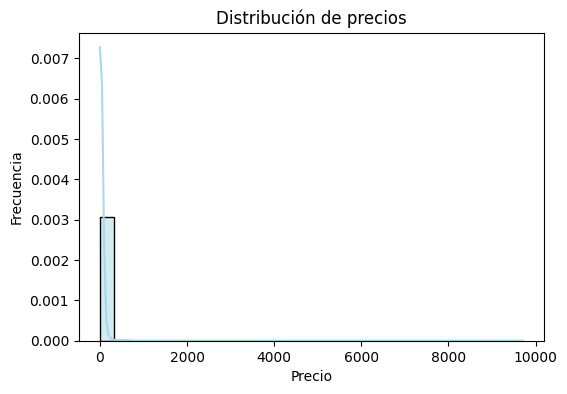

In [17]:
# Preprocesamiento
df_producto["precio"] = pd.to_numeric(df_producto["precio"], errors="coerce")

# Estadísticas
print("Precio - estadísticas:")
display(df_producto["precio"].describe())

# Gráfico
plt.figure(figsize=(6,4))
sns.histplot(df_producto["precio"].dropna(), bins=30, kde=True, stat="density", color="lightblue", edgecolor="black")
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

#### Volumen

Volumen - estadísticas:


count     12026.000000
mean       1033.562448
std        4717.072506
min           0.000000
25%         750.000000
50%         750.000000
75%         750.000000
max      225000.000000
Name: volumen, dtype: float64

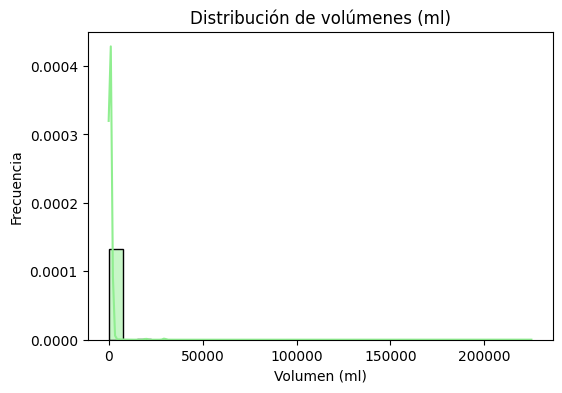

In [18]:
# Preprocesamiento
df_producto["volumen"] = pd.to_numeric(df_producto["volumen"], errors="coerce")

# Estadísticas
print("Volumen - estadísticas:")
display(df_producto["volumen"].describe())

# Gráfico
plt.figure(figsize=(6,4))
sns.histplot(df_producto["volumen"].dropna(), bins=30, kde=True, stat="density", color="lightgreen", edgecolor="black")
plt.title("Distribución de volúmenes (ml)")
plt.xlabel("Volumen (ml)")
plt.ylabel("Frecuencia")
plt.show()

#### Top categorías

Top 10 categorías por cantidad de productos:


,conteo
categoria_nombre,
DECANTERS & SPECIALTY PACKAGES,943
VODKA FLAVORED,711
IMPORTED ALE,668
MISC. IMPORTED CORDIALS & LIQUEURS,621
TEQUILA,597
SCOTCH WHISKIES,515
IMPORTED VODKA,495
STRAIGHT BOURBON WHISKIES,468
AMERICAN COCKTAILS,456


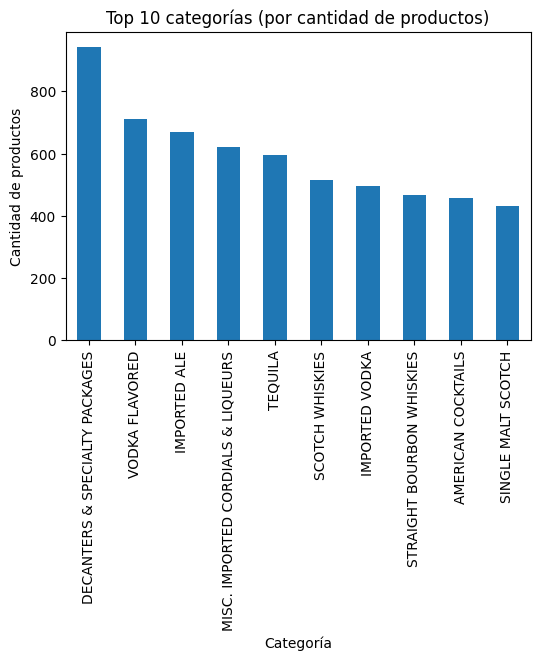

In [19]:
# Merge para agregar el nombre de la categoría
df_producto_cat = df_producto.merge(
    df_categoria.rename(columns={"id": "categoria_id", "categoria": "categoria_nombre"}),
    on="categoria_id",
    how="left"
)

# Top categorías por cantidad de productos (con nombre)
top_categorias = (
    df_producto_cat["categoria_nombre"]
    .value_counts()
    .head(10)
)

# Tabla
print("Top 10 categorías por cantidad de productos:")
display(top_categorias.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
top_categorias.plot(kind="bar", title="Top 10 categorías (por cantidad de productos)")
plt.ylabel("Cantidad de productos")
plt.xlabel("Categoría")
plt.show()

#### Top Marcas

Top 10 marcas por cantidad de productos:


,conteo
marca_nombre,
Diageo Americas,1022
Jim Beam Brands,1007
Pernod Ricard USA/Austin Nichols,640
"Yahara Bay Distillers, Inc",633
Heaven Hill Brands,448
Luxco-St Louis,433
"Sazerac Co., Inc.",397
"Bacardi U.S.A., Inc.",387
MHW Ltd,316


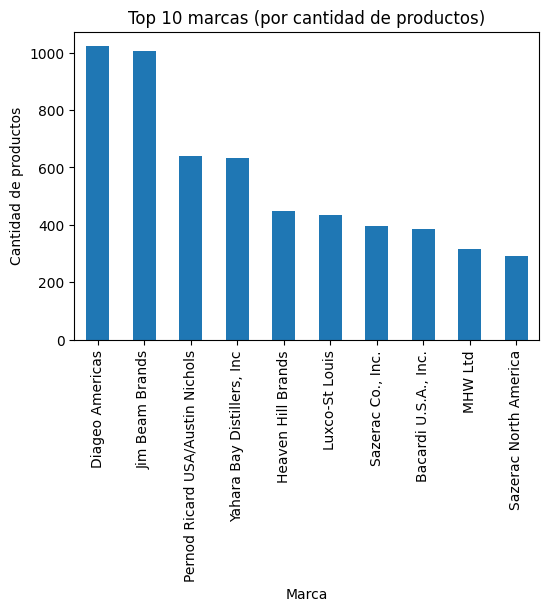

In [20]:
# Merge para agregar el nombre de la marca
df_producto_marca = df_producto.merge(
    df_marca.rename(columns={"id": "marca_id", "marca": "marca_nombre"}),
    on="marca_id",
    how="left"
)

# Top marcas por cantidad de productos (con nombre)
top_marcas = (
    df_producto_marca["marca_nombre"]
    .value_counts()
    .head(10)
)

# Tabla
print("Top 10 marcas por cantidad de productos:")
display(top_marcas.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
top_marcas.plot(kind="bar", title="Top 10 marcas (por cantidad de productos)")
plt.ylabel("Cantidad de productos")
plt.xlabel("Marca")
plt.show()

### Cliente

#### Edad

Edad - estadísticas:


count    11719.000000
mean        21.381603
std         26.958812
min        -43.000000
25%         26.000000
50%         31.000000
75%         37.000000
max         57.000000
Name: edad, dtype: float64

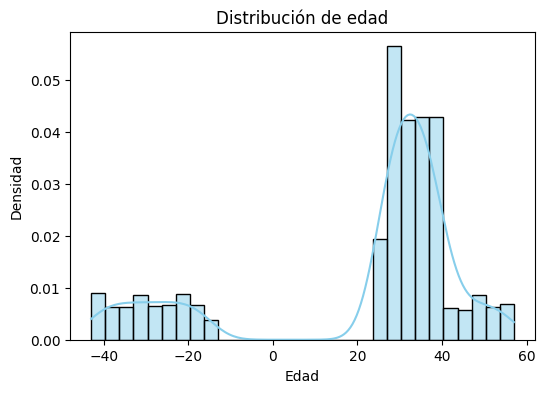

In [21]:
# Preprocesamiento
df_cliente["nacimiento"] = pd.to_datetime(
    df_cliente["nacimiento"],
    format="%m/%d/%y",  # mes/día/año
    errors="coerce"
)
today = pd.Timestamp.today()
df_cliente["edad"] = ((today - df_cliente["nacimiento"]).dt.days / 365.25).round()

# Estadísticas
print("Edad - estadísticas:")
display(df_cliente["edad"].describe())

# Gráfico

plt.figure(figsize=(6,4))
# Histograma de edad
sns.histplot(df_cliente["edad"].dropna(), bins=30, kde=True, stat="density", color="skyblue", edgecolor="black")

plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

#### Género

Distribución por género:


,conteo
genero,
Female,5895
Male,5824
NaN,281


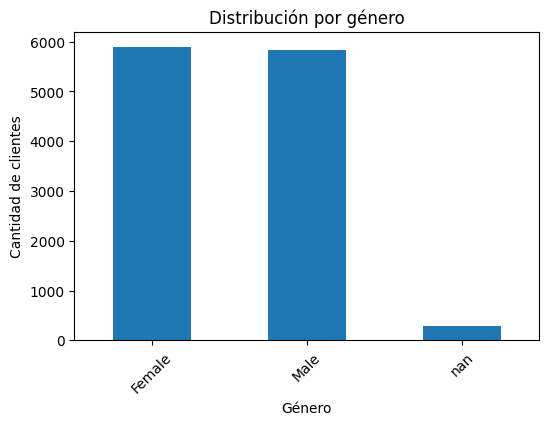

In [22]:
# Preprocesamiento
genero_counts = df_cliente["genero"].value_counts(dropna=False)

# Estadísticas
print("Distribución por género:")
display(genero_counts.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
genero_counts.plot(kind="bar", title="Distribución por género")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Género")
plt.xticks(rotation=45)
plt.show()

#### Top Idiomas

Top 10 idiomas declarados:


,conteo
idioma,
Mongolian,143
Dutch,141
Hungarian,140
Malayalam,138
Papiamento,138
Finnish,137
Nepali,136
Maltese,135
Bosnian,135


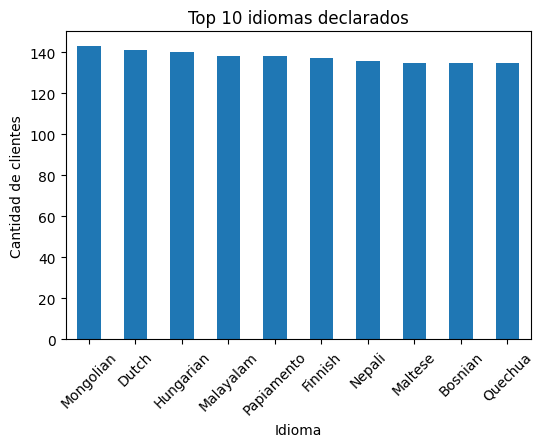

In [23]:
# Preprocesamiento
idioma_counts = df_cliente["idioma"].value_counts().head(10)

# Estadísticas
print("Top 10 idiomas declarados:")
display(idioma_counts.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
idioma_counts.plot(kind="bar", title="Top 10 idiomas declarados")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.show()

#### Top Ciudades

Top 10 ciudades declaradas:


,conteo
ciudad,
Stockholm,22
GÌ¦teborg,17
Oslo,17
San Francisco,10
San Isidro,9
Toledo,8
ÌÐrebro,8
Helsingborg,8
Toulouse,7


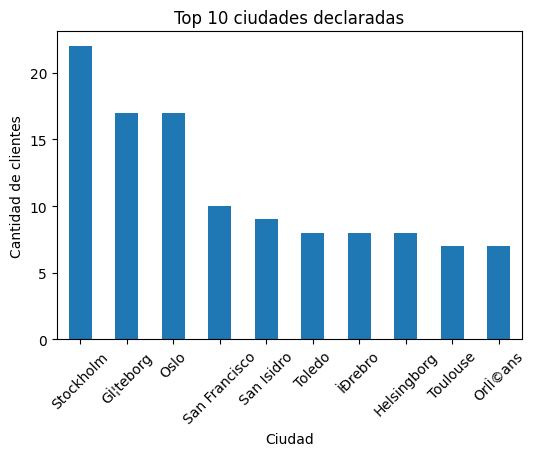

In [24]:
# Preprocesamiento
ciudad_counts = df_cliente["ciudad"].value_counts().head(10)

# Top 10 ciudades
print("Top 10 ciudades declaradas:")
display(ciudad_counts.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
ciudad_counts.plot(kind="bar", title="Top 10 ciudades declaradas")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Ciudad")
plt.xticks(rotation=45)
plt.show()

### Evento

#### Tipos

Distribución por tipo de evento:


,conteo
event,
view,2664312
addtocart,69332
transaction,22457


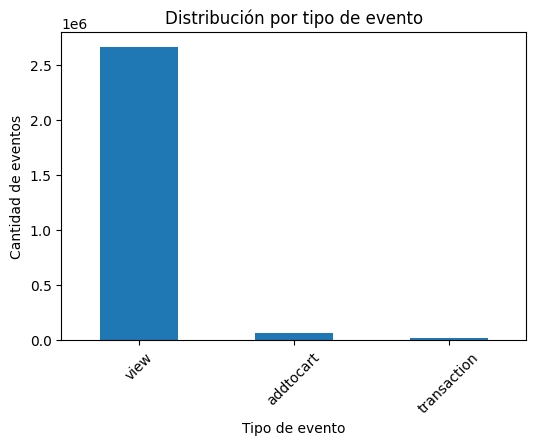

In [25]:
# Preprocesamiento
event_counts = df_evento["event"].value_counts()

# Estadísticas
print("Distribución por tipo de evento:")
display(event_counts.to_frame("conteo"))

# Gráfico
plt.figure(figsize=(6,4))
event_counts.plot(kind="bar", title="Distribución por tipo de evento")
plt.ylabel("Cantidad de eventos")
plt.xlabel("Tipo de evento")
plt.xticks(rotation=45)
plt.show()

#### Cantidad al día

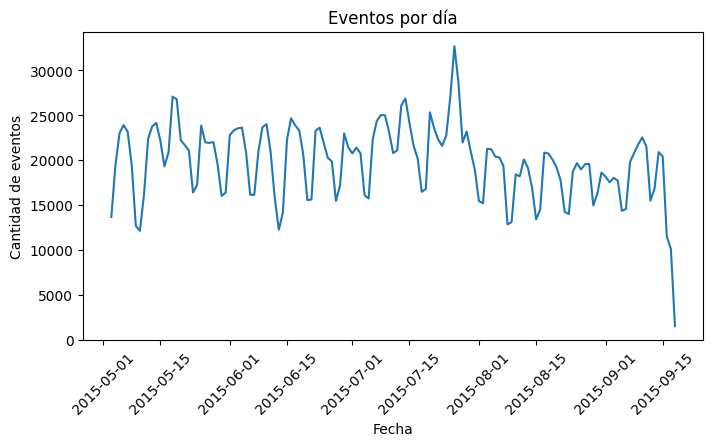

In [26]:
# Preprocesamiento
df_evento["ts"] = pd.to_datetime(pd.to_numeric(df_evento["timestamp"], errors="coerce"), unit="ms", errors="coerce")
eventos_por_dia = df_evento.groupby(df_evento["ts"].dt.date).size()

# Gráfico
plt.figure(figsize=(8,4))
eventos_por_dia.plot(kind="line", title="Eventos por día")
plt.ylabel("Cantidad de eventos")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.show()